In [132]:
# 下記セルを実行すると、authorization codeの入力を求められます。
# 出力されたリンク先をクリックし、Googleアカウントにログインし、
# authorization codeをコピーし、貼り付けをおこなってください。
#from google.colab import drive
#drive.mount('/content/drive')

In [133]:
#import os 
#project = '100knock-process-visualization'
#chapter = 4
#os.chdir(f'/content/drive/MyDrive/{project}/chapter-{chapter}/')

# ４章 言語データの加工・可視化を行う１０本ノック

## ノック５１：テキストファイルを読み込もう

In [134]:
ls ../data/

hashire_merosu.txt     wc_noun-verb_base.png  wc_noun_base_2.png
stop_words.txt         wc_noun_base_1.png     wc_noun_surface.png


In [135]:
with open("../data/hashire_merosu.txt", mode="r", encoding="shift-jis") as f:
    content = f.read()
print(content)

走れメロス
太宰治

-------------------------------------------------------
【テキスト中に現れる記号について】

《》：ルビ
（例）邪智暴虐《じゃちぼうぎゃく》

｜：ルビの付く文字列の始まりを特定する記号
（例）疲労｜困憊《こんぱい》

［＃］：入力者注　主に外字の説明や、傍点の位置の指定
（例）［＃地から１字上げ］
-------------------------------------------------------

　メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。
「王様は、人を殺します。」
「なぜ殺すのだ。」
「悪心を抱いてい

## ノック５２：本文を抽出して１つに纏めよう

In [136]:
content = " ".join(content.split())
content

'走れメロス 太宰治 ------------------------------------------------------- 【テキスト中に現れる記号について】 《》：ルビ （例）邪智暴虐《じゃちぼうぎゃく》 ｜：ルビの付く文字列の始まりを特定する記号 （例）疲労｜困憊《こんぱい》 ［＃］：入力者注 主に外字の説明や、傍点の位置の指定 （例）［＃地から１字上げ］ ------------------------------------------------------- メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。 「王様は、人を殺します。」 「なぜ殺すのだ。」 「悪心を抱いている、という

In [137]:
import unicodedata
content = unicodedata.normalize("NFKC", content)
content

'走れメロス 太宰治 ------------------------------------------------------- 【テキスト中に現れる記号について】 《》:ルビ (例)邪智暴虐《じゃちぼうぎゃく》 |:ルビの付く文字列の始まりを特定する記号 (例)疲労|困憊《こんぱい》 [#]:入力者注 主に外字の説明や、傍点の位置の指定 (例)[#地から1字上げ] ------------------------------------------------------- メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。 「王様は、人を殺します。」 「なぜ殺すのだ。」 「悪心を抱いている、という

In [138]:
import re
pattern = re.compile(r'^.+(#地から1字上げ].+#地から1字上げ]).+$')
body = re.match(pattern, content).group(1)
print(body)

#地から1字上げ] ------------------------------------------------------- メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。 「王様は、人を殺します。」 「なぜ殺すのだ。」 「悪心を抱いている、というのですが、誰もそんな、悪心を持っては居りませぬ。」 「たくさんの人を殺したのか。」 「はい、はじめは王様の妹婿さまを。それから、御自身のお世嗣《よつぎ》を。それから、妹さまを。それから、妹さまの御子さまを。それから、皇后さまを。それから、賢臣のアレキス様を。」 「おどろいた。国王は乱心か。」 「いいえ、乱心ではございませぬ。人を、信ずる事が出来ぬ、とい

In [139]:
body = body.replace("#地から1字上げ] ------------------------------------------------------- ", "")
body = body.replace("[#地から1字上げ]", "")
body

'メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。 「王様は、人を殺します。」 「なぜ殺すのだ。」 「悪心を抱いている、というのですが、誰もそんな、悪心を持っては居りませぬ。」 「たくさんの人を殺したのか。」 「はい、はじめは王様の妹婿さまを。それから、御自身のお世嗣《よつぎ》を。それから、妹さまを。それから、妹さまの御子さまを。それから、皇后さまを。それから、賢臣のアレキス様を。」 「おどろいた。国王は乱心か。」 「いいえ、乱心ではございませぬ。人を、信ずる事が出来ぬ、というのです。このごろは、臣下の心をも、お疑いになり、少しく派手な暮しをしている者には、人質ひとりずつ差し出すことを命じて居ります。御

## ノック５３：本文以外の項目を取り出そう

In [140]:
with open("../data/hashire_merosu.txt", mode="r", encoding="shift-jis") as f:
    title = f.readline()
    author = f.readline()
print(title)
print(author)

走れメロス

太宰治



In [141]:
title = title.replace("\n", "")
print(title)
author = author.replace("\n", "")
print(author)

走れメロス
太宰治


In [142]:
with open("../data/hashire_merosu.txt", mode="r", encoding="shift-jis") as f:
    content = f.readlines()
content

['走れメロス\n',
 '太宰治\n',
 '\n',
 '-------------------------------------------------------\n',
 '【テキスト中に現れる記号について】\n',
 '\n',
 '《》：ルビ\n',
 '（例）邪智暴虐《じゃちぼうぎゃく》\n',
 '\n',
 '｜：ルビの付く文字列の始まりを特定する記号\n',
 '（例）疲労｜困憊《こんぱい》\n',
 '\n',
 '［＃］：入力者注\u3000主に外字の説明や、傍点の位置の指定\n',
 '（例）［＃地から１字上げ］\n',
 '-------------------------------------------------------\n',
 '\n',
 '\u3000メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどは

In [143]:
import pandas as pd
df = pd.DataFrame(content, columns=["text"])
df["text"] = df["text"].str.replace("\n", "")
df

,text
0,走れメロス
1,太宰治
2,
3,----------------------------------------------...
4,【テキスト中に現れる記号について】
...,...
100,校正：高橋美奈子
101,2000年12月4日公開
102,2011年1月17日修正
103,青空文庫作成ファイル：


In [144]:
date = df[(df["text"].str.contains("日公開"))|(df["text"].str.contains("日修正"))].copy()
print(date)

date["text"] = date["text"].str.replace("公開", "")
date["text"] = date["text"].str.replace("修正", "")
print(date)

date["text"] = date["text"].str.replace("年", "/")
date["text"] = date["text"].str.replace("月", "/")
date["text"] = date["text"].str.replace("日", "")
print(date)

date["text"] = pd.to_datetime(date["text"])
print(date)
date.dtypes

             text
101  2000年12月4日公開
102  2011年1月17日修正
           text
101  2000年12月4日
102  2011年1月17日
          text
101  2000/12/4
102  2011/1/17
          text
101 2000-12-04
102 2011-01-17


text    datetime64[ns]
dtype: object

In [145]:
release_date = date.iat[0, 0]
update_date = date.iat[1, 0]
print(release_date)
print(update_date)
date = update_date - release_date
print(date)

2000-12-04 00:00:00
2011-01-17 00:00:00
3696 days 00:00:00


In [146]:
booklist = pd.DataFrame([[title, author, release_date, update_date, body]], columns=["title", "author", "release_date", "update_date", "body"])
booklist

,title,author,release_date,update_date,body
0,走れメロス,太宰治,2000-12-04,2011-01-17,メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。...


## ノック５４：形態素解析で単語に分割しよう

In [147]:
import MeCab
tagger = MeCab.Tagger()
body = booklist.iloc[0,4]
parsed = tagger.parse(body).split("\n")
parsed[:4]

['メロス\t名詞,一般,*,*,*,*,*',
 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ',
 '激怒\t名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド',
 'し\t動詞,自立,*,*,サ変・スル,連用形,する,シ,シ']

In [148]:
parsed[-4:]

['た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ', '。\t記号,句点,*,*,*,*,。,。,。', 'EOS', '']

In [149]:
parsed = parsed[:-2]
parsed[-4:]

['赤面\t名詞,サ変接続,*,*,*,*,赤面,セキメン,セキメン',
 'し\t動詞,自立,*,*,サ変・スル,連用形,する,シ,シ',
 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ',
 '。\t記号,句点,*,*,*,*,。,。,。']

## ノック５５：分割した単語をデータフレームで保持しよう

In [150]:
*values, = map(lambda s: re.split(r"\t|,", s), parsed)
values[:4]

[['メロス', '名詞', '一般', '*', '*', '*', '*', '*'],
 ['は', '助詞', '係助詞', '*', '*', '*', '*', 'は', 'ハ', 'ワ'],
 ['激怒', '名詞', 'サ変接続', '*', '*', '*', '*', '激怒', 'ゲキド', 'ゲキド'],
 ['し', '動詞', '自立', '*', '*', 'サ変・スル', '連用形', 'する', 'シ', 'シ']]

In [151]:
import pandas as pd
columns = ["表層形","品詞","品詞細分類1","品詞細分類2","品詞細分類3","活用型","活用形","原形","読み","発音"]
mecab_df = pd.DataFrame(data=values, columns=columns)
print(len(mecab_df))
mecab_df.head(4)

6712


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
1,は,助詞,係助詞,*,*,*,*,は,ハ,ワ
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
3,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ


## ノック５６：名詞と動詞を取り出そう

In [152]:
print(mecab_df.groupby(["原形","品詞"]).size().sort_values(ascending=False))

原形    品詞
、     記号    555
。     記号    458
は     助詞    268
て     助詞    237
の     助詞    225
           ... 
け     助詞      1
反駁    名詞      1
取り直す  動詞      1
取り返す  動詞      1
齧る    動詞      1
Length: 1325, dtype: int64


In [153]:
noun = mecab_df.loc[mecab_df["品詞"]=="名詞"]
noun

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
13,ゃちぼうぎゃく,名詞,固有名詞,組織,*,*,*,*,None,None
...,...,...,...,...,...,...,...,...,...,...
6691,皆,名詞,代名詞,一般,*,*,*,皆,ミナ,ミナ
6695,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6700,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6704,勇者,名詞,一般,*,*,*,*,勇者,ユウシャ,ユーシャ


In [154]:
verb = mecab_df.loc[(mecab_df["品詞"]=="名詞")|(mecab_df["品詞"]=="動詞")]
verb

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
3,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
...,...,...,...,...,...,...,...,...,...,...
6695,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6700,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6704,勇者,名詞,一般,*,*,*,*,勇者,ユウシャ,ユーシャ
6708,赤面,名詞,サ変接続,*,*,*,*,赤面,セキメン,セキメン


## ノック５７：不要な単語を除外しよう

In [155]:
with open("../data/stop_words.txt", mode="r") as f:
    stop_words = f.read().split()
stop_words

['する', 'いる', 'なる', 'れる', 'よう']

In [156]:
print(len(noun))
noun = noun.loc[~noun["原形"].isin(stop_words)]
print(len(noun))
display(noun.head())

print(len(verb))
verb = verb.loc[~verb["原形"].isin(stop_words)]
print(len(verb))
display(verb.head())

1686
1673


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
13,ゃちぼうぎゃく,名詞,固有名詞,組織,*,*,*,*,None,None


2666
2448


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
13,ゃちぼうぎゃく,名詞,固有名詞,組織,*,*,*,*,None,None


## ノック５８：単語の使用状況をグラフで可視化しよう

In [157]:
count = noun.groupby("原形").size().sort_values(ascending=False)
count.name = "count"
count = count.reset_index().head(10)
count

,原形,count
0,*,155
1,の,78
2,私,76
3,人,30
4,おまえ,20
5,王,19
6,友,18
7,事,15
8,君,13
9,三,12


<AxesSubplot:xlabel='count', ylabel='原形'>

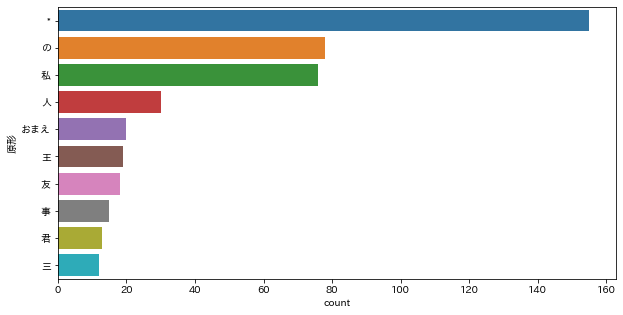

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns 
import japanize_matplotlib
plt.figure(figsize=(10,5))
sns.barplot(x=count["count"], y=count["原形"])

## ノック５９：単語の傾向をWordCloudで可視化してみよう

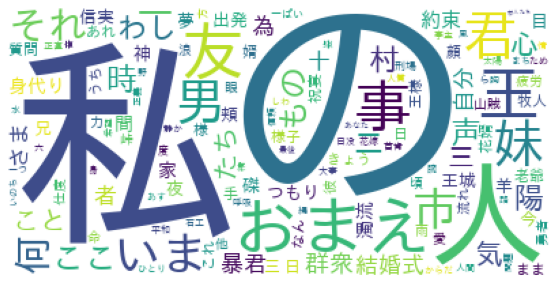

In [159]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import japanize_matplotlib
font_path = "~/Library/Fonts/ipaexg.ttf"
cloud = WordCloud(background_color="white", font_path=font_path).generate(" ".join(noun["原形"].values))
plt.figure(figsize=(10,5))
plt.imshow(cloud)
plt.axis("off")
plt.savefig("../data/wc_noun_base_2.png")
plt.show()

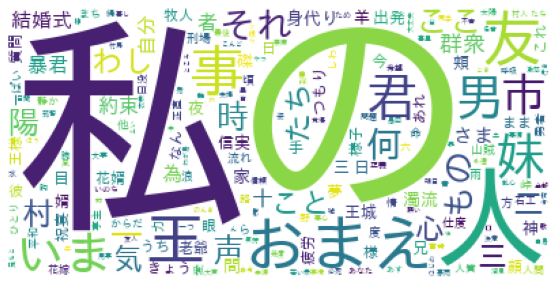

In [160]:
cloud = WordCloud(background_color="white", font_path=font_path, regexp="[\w']+").generate(" ".join(noun["原形"].values))
plt.figure(figsize=(10,5))
plt.imshow(cloud)
plt.axis("off")
plt.savefig("../data/wc_noun_base_1.png")
plt.show()

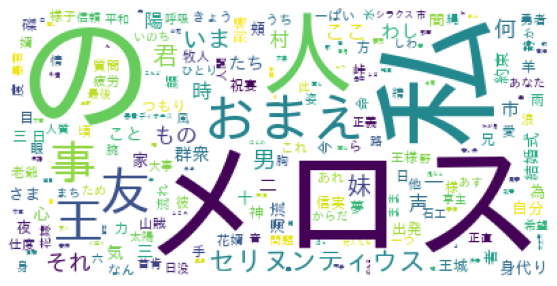

In [161]:
cloud = WordCloud(background_color="white", font_path=font_path).generate(" ".join(noun["表層形"].values))
plt.figure(figsize=(10,5))
plt.imshow(cloud)
plt.axis("off")
plt.savefig("../data/wc_noun_surface.png")
plt.show()

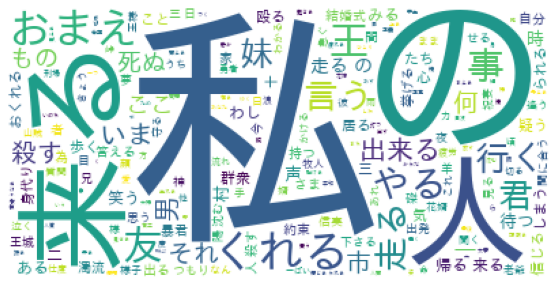

In [162]:
cloud = WordCloud(background_color="white", font_path=font_path).generate(" ".join(verb["原形"].values))
plt.figure(figsize=(10,5))
plt.imshow(cloud)
plt.axis("off")
plt.savefig("../data/wc_noun-verb_base.png")
plt.show()

## ノック６０：n-gramを作ってみよう

In [163]:
target = mecab_df["表層形"].to_list()
len(target)

6712

In [168]:
from nltk import ngrams
bigram = ngrams(target, 2)

In [169]:
import collections
counter = collections.Counter(bigram)
print(counter)

Counter({('た', '。'): 142, ('は', '、'): 129, ('だ', '。'): 72, ('。', '」'): 55, ('メロス', 'は'): 47, ('の', 'だ'): 45, ('て', '、'): 39, ('私', 'は'): 36, ('。', '私'): 34, ('。', 'メロス'): 33, ('て', 'いる'): 33, ('。', '「'): 31, ('し', 'た'): 25, ('し', 'て'): 25, ('」', '「'): 24, ('に', 'は'): 22, ('た', 'の'): 22, ('ぬ', '。'): 21, ('が', '、'): 21, ('も', '、'): 20, ('を', '、'): 18, ('に', '、'): 18, ('、', 'メロス'): 18, ('て', 'くれ'): 18, ('、', '私'): 17, ('て', '来'): 16, ('私', 'を'): 16, ('無い', '。'): 15, ('で', '、'): 15, ('ああ', '、'): 15, ('ある', '。'): 14, ('来', 'た'): 14, ('い', 'た'): 14, ('なら', 'ぬ'): 13, ('で', 'ある'): 13, ('て', 'い'): 13, ('れ', 'た'): 13, ('ない', '。'): 13, ('》', 'の'): 12, ('の', 'は'): 12, ('、', 'と'): 12, ('ます', '。'): 12, ('う', '。'): 12, ('あっ', 'た'): 11, ('に', 'なっ'): 11, ('いる', '。'): 11, ('で', 'は'): 11, ('か', '。'): 11, ('私', 'の'): 11, ('なっ', 'て'): 10, ('。', 'おまえ'): 10, ('で', 'あっ'): 9, ('の', '、'): 9, ('人', 'を'): 9, ('」', 'メロス'): 9, ('メロス', 'の'): 9, ('よう', 'に'): 9, ('帰っ', 'て'): 9, ('。', 'ああ'): 9, ('。', 'その'): 8, ('から', '